# 19CSE304 Lab Evaluation 2
## By Siddhartha Bhaskaran (CB.EN.U4CSE20260)

# 1

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
flowers = ["PURPLE","PURPLE","PURPLE","WHITE"]

In [4]:
NUM_PURPLE = 705 + 60
NUM_TOTAL = 929
NUM_WHITE = NUM_TOTAL - NUM_PURPLE
NUM_ITERS = 2000 - 260

In [5]:
df = pd.DataFrame({"Color":["White","Purple"],"Hypothesis":[0.25,0.75],"Sample":[NUM_WHITE/NUM_TOTAL, NUM_PURPLE/NUM_TOTAL]})

In [6]:
df

,Color,Hypothesis,Sample
0,White,0.25,0.176534
1,Purple,0.75,0.823466


# Test Statistic

In [7]:
def tvd(dist1, dist2):
    return abs(np.subtract(dist1, dist2)).sum() / 2

In [8]:
given_tvd = tvd(df["Hypothesis"],df["Sample"])
print(given_tvd)

0.07346609257265878


# Sampling Function

In [9]:
def sample_proportions(sample_size, probabilities):
    return np.random.multinomial(sample_size, probabilities)/ sample_size

# Answers

1. Null and Alternate hypothesis

$H_0$: The frequencies of the flowers in the sample is inline with the hypothesized frequencies.

$freq = [0.25, 0.75]$

$H_1$: The hypothesized frequencies do not correspond the sample frequencies

$freq \ne [0.25, 0.75]$

2. The test statistic used here is z score of TVD.

TVD is defined as $\frac{\Sigma |dist_1 - dist_2|}{2}$

Since 1740 is not smaller than 30 the z score can be used.

3. The observed TVD is $0.0228$. The empirical p value of $0.0228$ is $0.10$

In [11]:
stats.norm.ppf(0.10)

-1.2815515655446004



```
# This is formatted as code
```

This is the empirical z score. This suggests that the obtained sample lies $1.2 \sigma$ from the mean

*4*. Simulation

In [12]:
sampling_tvd = []
for _ in range(NUM_ITERS):
    tmp = sample_proportions(NUM_TOTAL, df["Hypothesis"])
    sampling_tvd.append(tvd(tmp, df["Hypothesis"]))

5. Visualization of the simulation

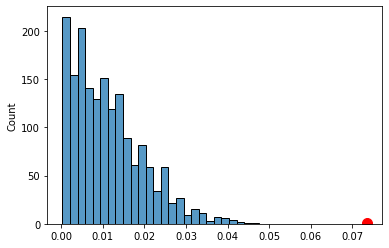

In [13]:
fig, ax = plt.subplots()
sns.histplot(ax=ax, x=sampling_tvd)
plt.scatter(given_tvd, 1, marker="o", s=100, color="r")
plt.show()

6. Outcome

    The empirical probability of obtaining a sample with atleast the TVD of the given sample is $0.10$, which is $10\%$. Since $10\%$ is greater than both of the most commonly used $\alpha$ values $[5\%,1\%]$, the __Null hypothesis should be rejected__. Mendel hypothesis that purple and white flowers of pea plant grow in the ratio of $3:1$ cannot be rejected.

# 2

In [ ]:
sigma = 13.46
mu = 60
n = 30
x_bar = 65.10
alpha = 0.05

## p-value method

In [14]:
import numpy as  np
import scipy.stats as st
std = 13.46
mu = 60
n = 30
x_bar = 65.10
alpha = 0.05

#H0 : mu = 60
#H1 : mu != 60


#critical value method 
z = (x_bar-mu)/(std/np.sqrt(n))
print("Calculated Statistic : ",z)


Calculated Statistic :  2.075323211943792


In [15]:
z_critical = np.abs(st.norm.ppf(alpha/2) )
print("Critical Value : ",z_critical)

if z<z_critical:
    print("Failed to Reject NULL Hypothesis")
else: 
    print("Reject NULL Hypothesis")

Critical Value :  1.9599639845400545
Reject NULL Hypothesis


The probability of getting a value equal to or greater than 65.10 is 1.9%, which is less the the significance level of 5%.

Hence the __Null hypothesis can be rejected__.

Mean can be different from $60$